In [1]:
from lpm_circ import *
from diff_circ import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
basic_circ_model = LPModel() # Define the model

# Add all the units in the numbering system indicated
# Links are [list_back, list_forward]
# Units are formulated w/ mmHg, mL, and s
# Diodes are located between the chambers of the heart and after each component of the venous circulation

basic_circ_model.add_unit(LPunit(0, 0.03, C=1, links=[[24],[1]], ics=[53,0], D_out=True)) # Right atrium
basic_circ_model.units[0].assign_nonlinear("C", pvt_ra) # Add the right atrium PV time relationship
basic_circ_model.add_unit(LPunit(1, 0.01, C=1, links=[[0],[2,5]], ics=[110,0], D_out=True)) # Right ventricle
basic_circ_model.units[1].assign_nonlinear("C", pvt_rv) # Add the right ventricle PV time relationship
basic_circ_model.add_unit(LPunit(2, 0.05, C=1.5, L = 0.001, links=[[1],[3]], ics=[64,0,0])) # R. proximal artery
basic_circ_model.add_unit(LPunit(3, 0.06, C=9, links=[[2],[4]], ics=[140,0])) # R. distal artery
basic_circ_model.add_unit(LPunit(4, 0.07, C=15, links=[[3],[8]], ics=[130,0])) # R. pulmonary vein
basic_circ_model.add_unit(LPunit(5, 0.05, C=1.5, L = 0.001, links=[[1],[6]], ics=[64,0,0])) # L. proximal artery
basic_circ_model.add_unit(LPunit(6, 0.06, C=9, links=[[5],[7]], ics=[140,0])) # L. distal artery
basic_circ_model.add_unit(LPunit(7, 0.07, C=15, links=[[6],[8]], ics=[130,0])) # L. pulmonary vein
basic_circ_model.add_unit(LPunit(8, 0.02, C=1, links=[[4,7],[9]], ics=[63,0], D_out=True)) # Left atrium
basic_circ_model.units[8].assign_nonlinear("C", pvt_la)
basic_circ_model.add_unit(LPunit(9, 0.02, C=1, links=[[8],[10,15,18,21]], ics=[123,0], D_out=True)) # Left ventricle
basic_circ_model.units[9].assign_nonlinear("C", pvt_lv)
basic_circ_model.add_unit(LPunit(10, 8, C=0.7, links=[[9],[11,13]], ics=[111,0])) # Brachiocephalic artery
basic_circ_model.add_unit(LPunit(11, 0.5, C=3, links=[[10],[12]], ics=[29,0])) # R. subclavian artery
basic_circ_model.add_unit(LPunit(12, 0.27, C=9, links=[[11],[24]], ics=[66,0])) # R. subclavian vein
basic_circ_model.add_unit(LPunit(13, 0.5, C=2, links=[[10],[14]], ics=[20,0])) # R. internal carotid artery
basic_circ_model.add_unit(LPunit(14, 0.25, C=9, links=[[13],[24]], ics=[69,0])) # R. jugular vein
basic_circ_model.add_unit(LPunit(15, 12, C=0.7, links=[[9],[16]], ics=[117,0])) # L. common carotid artery
basic_circ_model.add_unit(LPunit(16, 0.5, C=3, links=[[15],[17]], ics=[37,0])) # L. internal carotid artery
basic_circ_model.add_unit(LPunit(17, 0.25, C=9, links=[[16],[24]], ics=[66,0])) # L. jugular vein
basic_circ_model.add_unit(LPunit(18, 12, C=0.7, links=[[9],[19]], ics=[117,0])) # L. subclavian artery
basic_circ_model.add_unit(LPunit(19, 0.5, C=2, links=[[18],[20]], ics=[19,0], diffusive_region=True)) # L. upper arm artery
basic_circ_model.units[19].assign_diffusion_input(patch_diffusion)
basic_circ_model.add_unit(LPunit(20, 0.25, C=9, links=[[19],[24]], ics=[66,0])) # L. subclavian vein
basic_circ_model.add_unit(LPunit(21, 1.2, C=0.8, L=0.001, links=[[9],[22]], ics=[64,0,0])) # Desc. aorta
basic_circ_model.add_unit(LPunit(22, 1, C=1, links=[[21],[23]], ics=[217,0])) # Systemic arteries
basic_circ_model.units[22].assign_nonlinear("C", pv_proxart)
basic_circ_model.units[22].assign_nonlinear("R", rv_proxart)
basic_circ_model.add_unit(LPunit(23, 0.2, C=1, links=[[22],[24]], ics=[2526,0])) # Systemic veins
basic_circ_model.units[23].assign_nonlinear("C", pv_sysv)
basic_circ_model.add_unit(LPunit(24, 1, C=1, links=[[12,14,17,20,23],[0]], ics=[170,0])) # Vena cava
basic_circ_model.units[24].assign_nonlinear("C", pv_vena)
basic_circ_model.units[24].assign_nonlinear("R", rv_vena)

In [3]:
dt = .0001
T = 300
total_test = basic_circ_model.solve_model(dt, T)

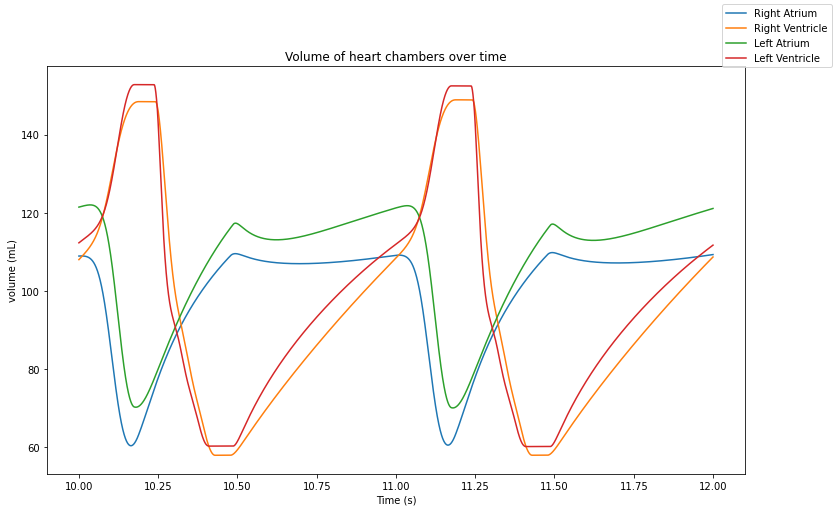

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(12/dt)], total_test[:,0][int(10/dt):int(12/dt)], label="Right Atrium")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(12/dt)], total_test[:,1][int(10/dt):int(12/dt)], label="Right Ventricle")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(12/dt)], total_test[:,8][int(10/dt):int(12/dt)], label="Left Atrium")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(12/dt)], total_test[:,9][int(10/dt):int(12/dt)], label="Left Ventricle")
ax.set(xlabel="Time (s)", ylabel="volume (mL)", title="Volume of heart chambers over time")
fig.set(figheight=7.5, figwidth=12.5)
fig.legend()

In [5]:
pressures = basic_circ_model.get_pressures()

In [6]:
pressures[0]

array([0.67819138, 0.67909775, 0.68000702, ..., 4.20444782, 4.2045866 ,
       4.29603513])

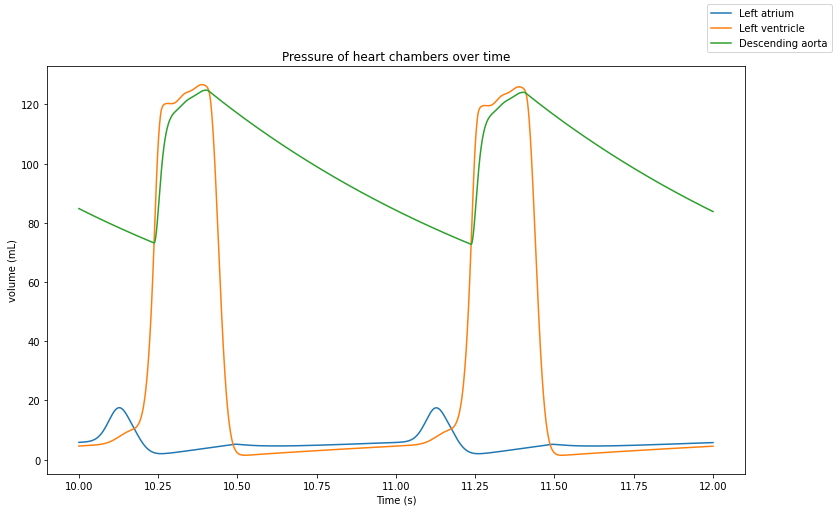

In [7]:
fig, ax = plt.subplots(1,1)
ax.set(xlabel="Time (s)", ylabel="volume (mL)", title="Pressure of heart chambers over time")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(12/dt)], pressures[8][int(10/dt):int(12/dt)], label="Left atrium")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(12/dt)], pressures[9][int(10/dt):int(12/dt)], label="Left ventricle")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(12/dt)], pressures[21][int(10/dt):int(12/dt)], label="Descending aorta")
fig.set(figheight=7.5, figwidth=12.5)
fig.legend()

[None, None]

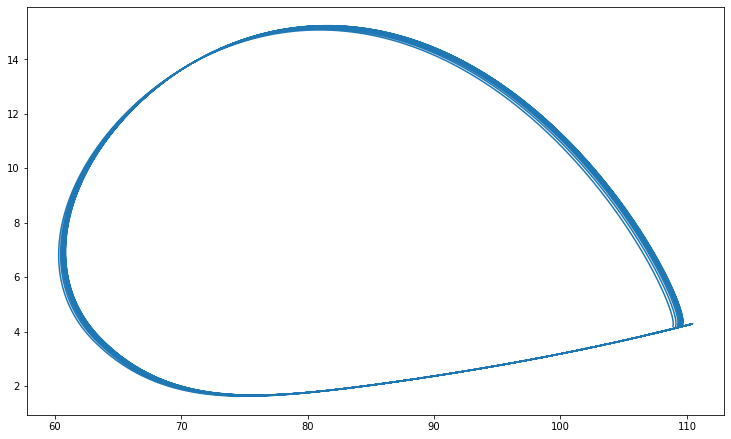

In [8]:
vstates = basic_circ_model.last_run["states"][:,:25]

fig, ax = plt.subplots(1,1)
ax.plot(vstates[:,0][int(10/dt):int(20/dt)], pressures[0][int(10/dt):int(20/dt)])
fig.set(figheight=7.5, figwidth=12.5)

[None, None]

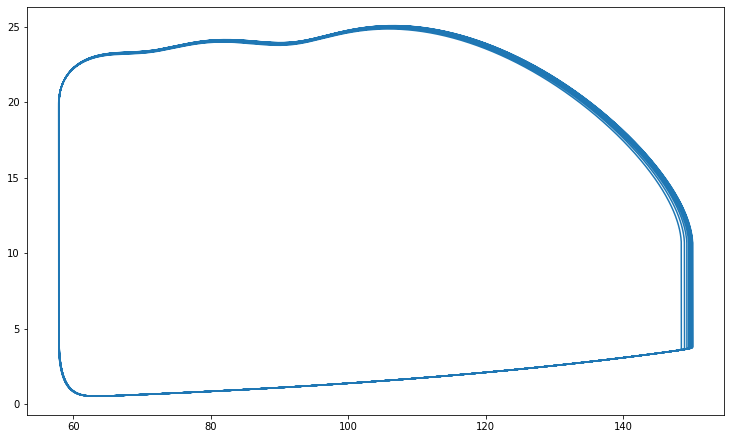

In [9]:
fig, ax = plt.subplots(1,1)
#ax.plot(pressures[0][int(10/dt):int(20/dt)])
#ax.plot(pressures[1][int(10/dt):int(20/dt)])
ax.plot(vstates[:,1][int(10/dt):int(20/dt)], pressures[1][int(10/dt):int(20/dt)])
fig.set(figheight=7.5, figwidth=12.5)

[None, None]

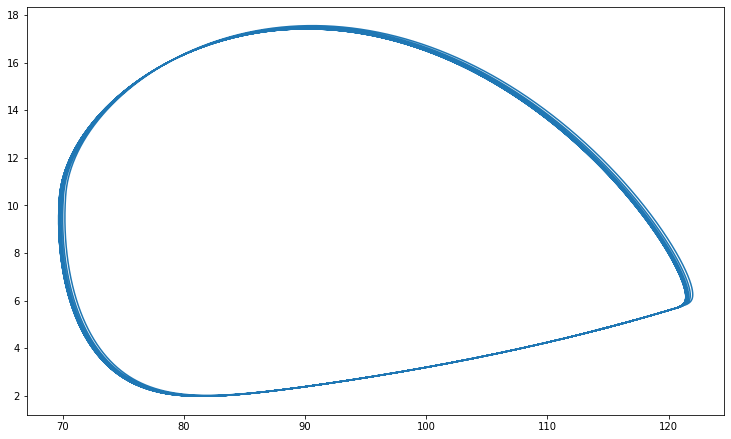

In [10]:
fig, ax = plt.subplots(1,1)
#ax.plot(pressures[0][int(10/dt):int(20/dt)])
#ax.plot(pressures[1][int(10/dt):int(20/dt)])
ax.plot(vstates[:,8][int(10/dt):int(20/dt)], pressures[8][int(10/dt):int(20/dt)])
fig.set(figheight=7.5, figwidth=12.5)

[None, None]

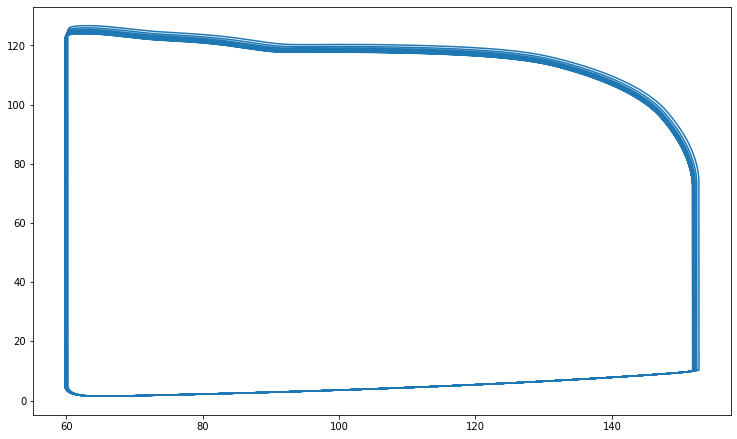

In [11]:
fig, ax = plt.subplots(1,1)
#ax.plot(pressures[0][int(10/dt):int(20/dt)])
#ax.plot(pressures[1][int(10/dt):int(20/dt)])
ax.plot(vstates[:,9][int(10/dt):int(20/dt)], pressures[9][int(10/dt):int(20/dt)])
fig.set(figheight=7.5, figwidth=12.5)

In [12]:
concentrations = basic_circ_model.get_conc()

[None, None]

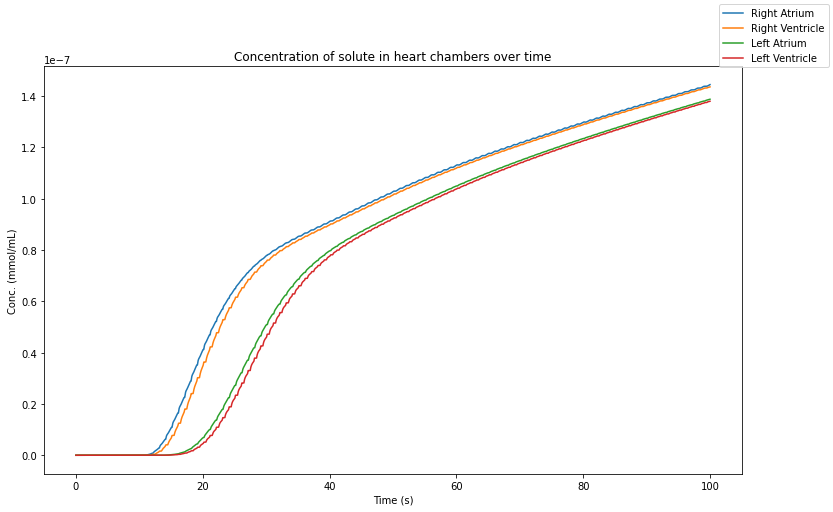

In [13]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(100/dt)], concentrations[0][int(0/dt):int(100/dt)], label="Right Atrium")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(100/dt)], concentrations[1][int(0/dt):int(100/dt)], label="Right Ventricle")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(100/dt)], concentrations[8][int(0/dt):int(100/dt)], label="Left Atrium")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(100/dt)], concentrations[9][int(0/dt):int(100/dt)], label="Left Ventricle")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)", title="Concentration of solute in heart chambers over time")
fig.legend()
fig.set(figheight=7.5, figwidth=12.5)

[None, None]

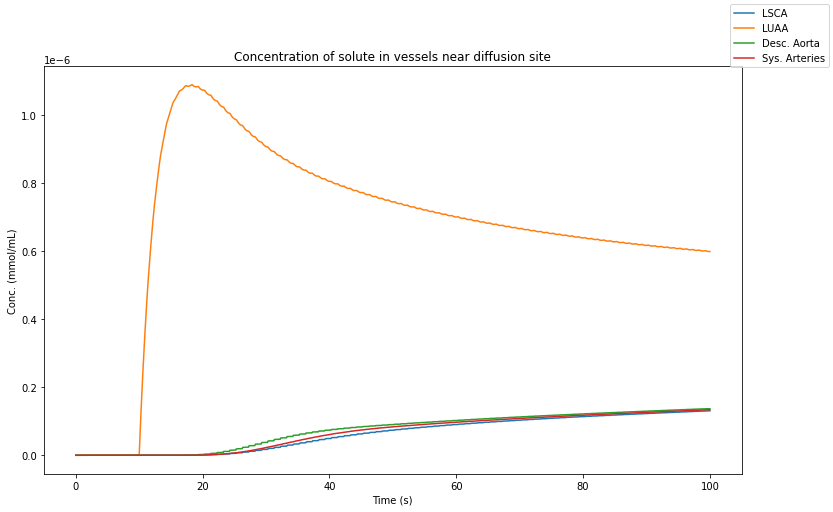

In [14]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(100/dt)], concentrations[18][int(0/dt):int(100/dt)], label="LSCA")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(100/dt)], concentrations[19][int(0/dt):int(100/dt)], label="LUAA")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(100/dt)], concentrations[21][int(0/dt):int(100/dt)], label="Desc. Aorta")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(100/dt)], concentrations[22][int(0/dt):int(100/dt)], label="Sys. Arteries")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)", title="Concentration of solute in vessels near diffusion site")
fig.legend()
fig.set(figheight=7.5, figwidth=12.5)

[None, None]

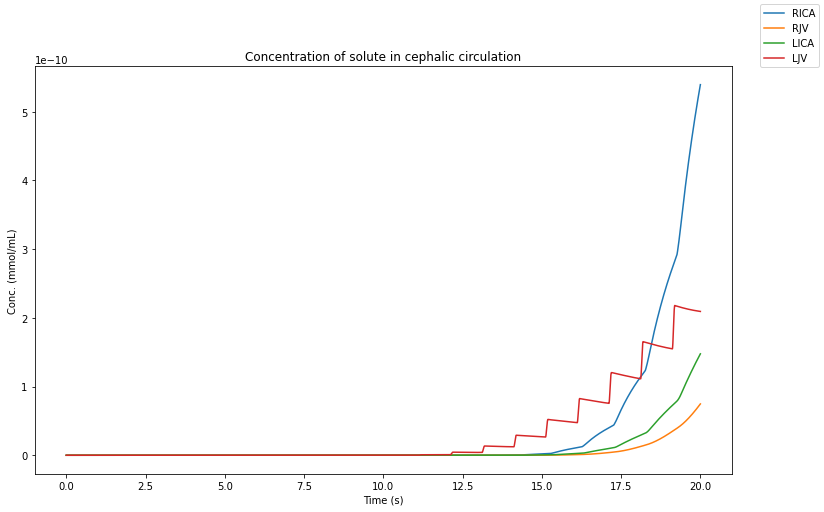

In [15]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(20/dt)], concentrations[13][int(0/dt):int(20/dt)], label="RICA")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(20/dt)], concentrations[14][int(0/dt):int(20/dt)], label="RJV")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(20/dt)], concentrations[16][int(0/dt):int(20/dt)], label="LICA")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(0/dt):int(20/dt)], concentrations[17][int(0/dt):int(20/dt)], label="LJV")
ax.set(xlabel="Time (s)", ylabel="Conc. (mmol/mL)", title="Concentration of solute in cephalic circulation")
fig.legend()
fig.set(figheight=7.5, figwidth=12.5)

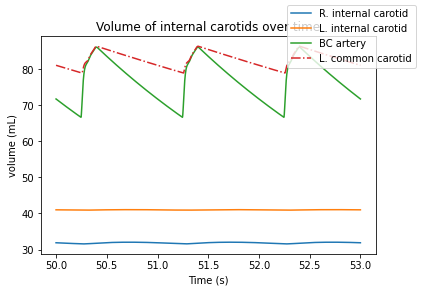

In [16]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,13][int(50/dt):int(53/dt)], label="R. internal carotid")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,16][int(50/dt):int(53/dt)], label="L. internal carotid")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,10][int(50/dt):int(53/dt)], label="BC artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,15][int(50/dt):int(53/dt)], "-.", label="L. common carotid")
ax.set(xlabel="Time (s)", ylabel="volume (mL)", title="Volume of internal carotids over time")
fig.legend()

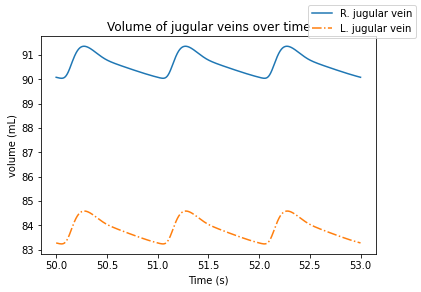

In [17]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,14][int(50/dt):int(53/dt)], label="R. jugular vein")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,17][int(50/dt):int(53/dt)], "-.", label="L. jugular vein")
ax.set(xlabel="Time (s)", ylabel="volume (mL)", title="Volume of jugular veins over time")
fig.legend()

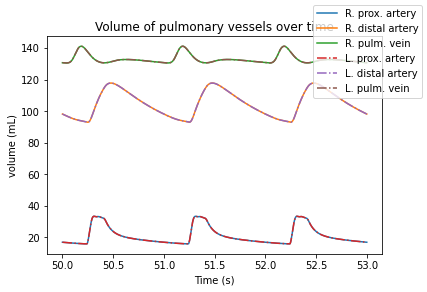

In [18]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,2][int(50/dt):int(53/dt)], label="R. prox. artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,3][int(50/dt):int(53/dt)], label="R. distal artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,4][int(50/dt):int(53/dt)], label="R. pulm. vein")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,5][int(50/dt):int(53/dt)], "-.", label="L. prox. artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,6][int(50/dt):int(53/dt)], "-.", label="L. distal artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,7][int(50/dt):int(53/dt)], "-.", label="L. pulm. vein")
ax.set(xlabel="Time (s)", ylabel="volume (mL)", title="Volume of pulmonary vessels over time")
fig.legend()

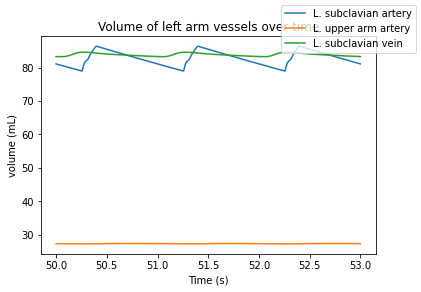

In [19]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,18][int(50/dt):int(53/dt)], label="L. subclavian artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,19][int(50/dt):int(53/dt)], label="L. upper arm artery")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(50/dt):int(53/dt)], total_test[:,20][int(50/dt):int(53/dt)], label="L. subclavian vein")
ax.set(xlabel="Time (s)", ylabel="volume (mL)", title="Volume of left arm vessels over time")
fig.legend()

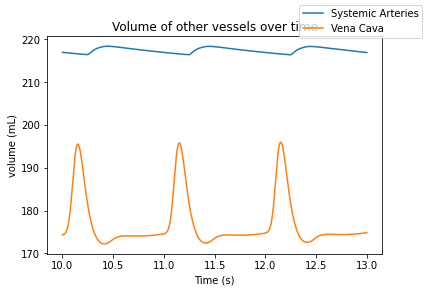

In [20]:
fig, ax = plt.subplots(1,1)
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(13/dt)], total_test[:,22][int(10/dt):int(13/dt)], label="Systemic Arteries")
ax.plot(np.linspace(0, T, int(T/dt)+1)[int(10/dt):int(13/dt)], total_test[:,24][int(10/dt):int(13/dt)], label="Vena Cava")
ax.set(xlabel="Time (s)", ylabel="volume (mL)", title="Volume of other vessels over time")
fig.legend()

In [21]:
E_eslv

4.3

In [22]:
E_esrv

0.8